# SVD(Singular Value Decomposition) 
SVD역시 PCA와 유사한 행렬 분해 기법 사용  
PCA의 경우 정방행렬(행과 열의 크기가 같은 행렬)만을 고유 벡터로 분해할 수 있지만  
SVD의 경우 행과 열의 크기가 다른 행렬에도 적용 가능  
SVD는 특이값 분해로 불림

In [4]:
#넘파이의 svd모듈 임포트
import numpy as np
from numpy.linalg import svd

#4*4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
#이렇게 생성된 a행렬에 SVD를 적용해 U, sigaa, Vt를 도출
#SVD분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬, sigma행렬, V전치 행렬을 반환
#시그마 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('Vt Value:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
Vt Value:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [6]:
#분해된 이 u, sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인
#Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [7]:
#데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma값이 변하고 이에 따른 차원 축소가 진행될 수 있는지 알아보기
#일부러 의존성을 부여하기 위해 a행렬의 3번째 로우를 '첫번째 로우 + 두번째 로우'로 업데이트하고 4번째 로우는 첫번째 로우와 같다고 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [8]:
#다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


이전과 차원은 같지만 Sigma값 중 2개가 0으로 변함  
즉 선형 독립인 로우 벡터의 개수가 2개라는 의미

U, Sigma, Vt를 이용해 다시 원본 행렬로 복원  
이번에는 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원  
즉 Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고 Vt의 경우는 선행 두 개의 행만 추출해 복원하는 것

In [9]:
#U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
#U, Sigma, Vt의 내적을 수행하며 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


## Truncated SVD를 이용해 행렬을 분해
Truncated SVD란 시그마 행렬에 있는 대각원소 즉 특이값 중 상위 일부데이터만 추출해 분해하는 방식  
이렇게 분해하면 인위적으로 더 작은 차원의 U, 시그마, Vt로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 순 없지만  
데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬 근사 가능  
원래 차원의 차수에 가깝게 잘라낼수록 원본 행렬에 더 가깝게 복원 가능

사이파이 모듈을 이용해 Truncated SVD  
Truncated SVD는 희소행렬로만 지원되어 scipy.sparse.linalg.svds를 이용해야 함  
임의의 원본 행렬 6*6을 Normal SVD로 분해해 분해된 행렬의 차원과 시그마 행렬 내의 특이값을 확인 한 뒤  
다시 Trucated sVD로 분해해 분해된 행렬의 차원, 시그마 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산해 다시 복원된 데이터와 원본 데이터를 비교

In [13]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma 값 행렬:', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) #Output of TruncateSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

Truncated SVD의 n_components를 4로 설정해 U, Sigma, Vt를 (6,4), (4,), (4,6)로 각각 분해  
근사적으로 복원됨을 확인할 수 있음

## 사이킷런 TruncatedSVD 클래스를 이용한 변환
사이킷런의 TruncatedSVD클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt를 행렬을 반환하지는 않음  
사이킷런의 TruncatedSVD클래스는 PCA클래스와 유사하게 fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉 Truncated SVD의 K컴포넌트 수)로 차원을 축소해 변환  
원본 데이터를 Truncated SVD방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

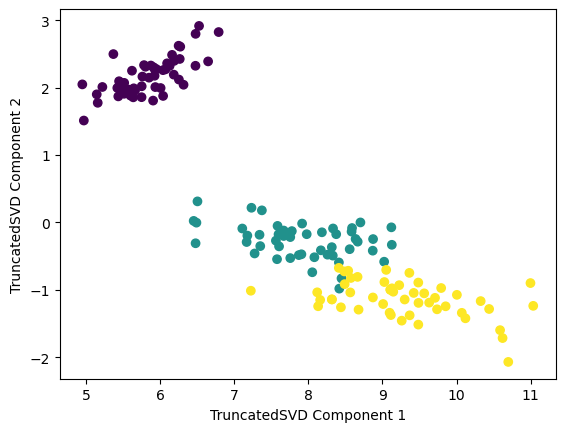

In [16]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

#2개의 주요 컴포넌트로 TruncatedSVD변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

사이킷런의 TruncatedSVD와 PCA 클래스 구현을 살펴보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해함  
붓꽃 데이터를 스케일링으로 변환한 뒤 TruncatedSVD와 PCA 변환을 해보면 두 개가 거의 동일함을 알 수 있음

Text(0.5, 1.0, 'PCA Transformed')

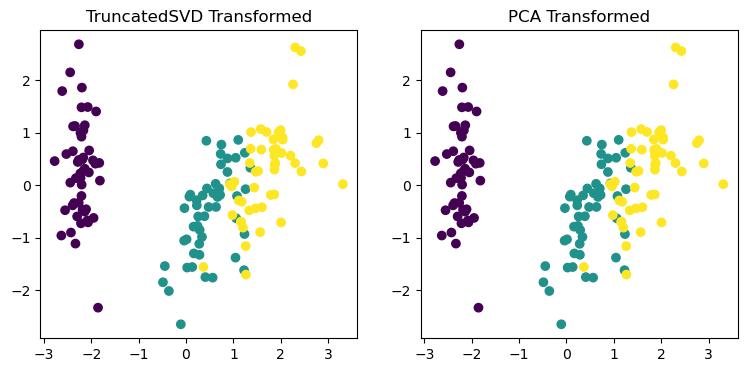

In [17]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

#TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols = 2)
ax1.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:, 1], c = iris.target)
ax2.scatter(x = iris_pca[:, 0], y = iris_tsvd[:, 1], c = iris.target)
ax1.set_title('TruncatedSVD Transformed')
ax2.set_title('PCA Transformed')

In [20]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3319772039324485e-15
5.421010862427522e-17


데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행  
이는 PCA가 SVD 알고리즘으로 구현됐음을 의미  
그러나 PCA는 밀집행렬에 대한 변환만 가능하며 SVD는 희소행렬에 대한 변환도 가능

## NMF(Non-Negative Matrix Factorization)
NMF: Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형  
NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭

4*6 원본 행렬 V는 4*2 행렬 W와 2*6 행렬 H로 근사해 분해될 수 있음  
이처럼 행렬 분해를 하게 되면 W행렬과 H행렬은 일반적으로 길고 가는 행렬인 W, 작고 넓은 행렬인 H로 분해됨  
이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 됨  
분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며  
분해 행렬 H는 이 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타내는 행렬

NMF는 사이킷런의 NMF 클래스를 이용해 지원됨  
붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화

C:\Users\motor\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


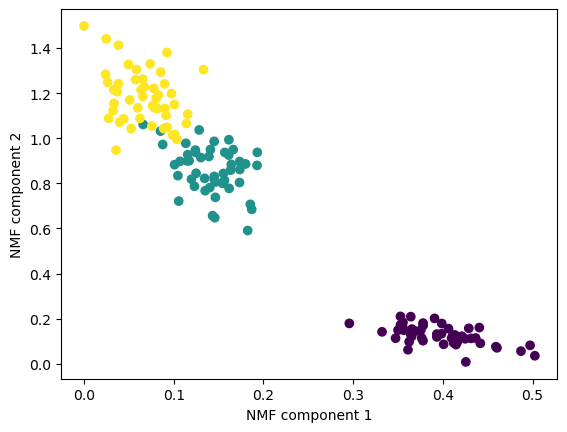

In [24]:
from sklearn.decomposition import NMF

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components = 2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:, 0], y = iris_nmf[:, 1], c = iris.target)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')
plt.show()